In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# Downloading dataset as zip in tmp folder

!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-05-18 20:35:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 2607:f8b0:400c:c15::80
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   120MB/s    in 0.5s    

2020-05-18 20:35:20 (120 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
# Extract Zip

import zipfile

location_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(location_zip,'r')         # Reading ZipFiles
zip_ref.extractall(path = '/tmp')
zip_ref.close()                                     # very essential to save what we have just done

In [0]:
# Joins the current directory with the train and validation directory

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

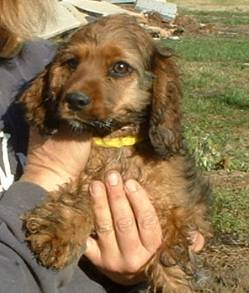

In [29]:
# displaying single image

from IPython.display import Image

img_index = 23
img_path = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index] 
Image(img_path)

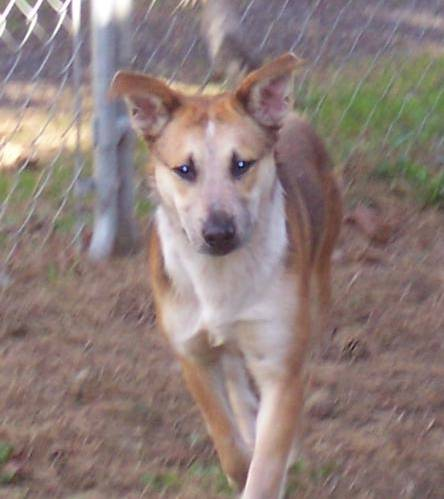

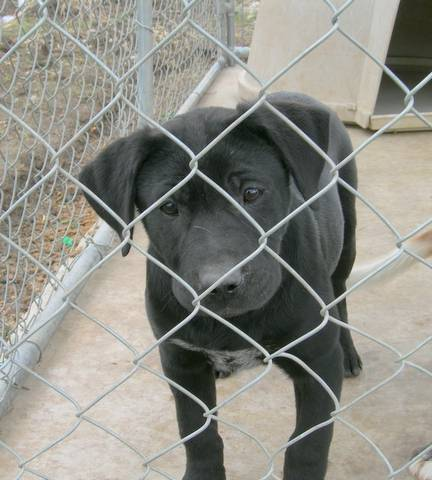

In [34]:
# Displaying multiple images

from IPython.display import Image, display

img_index_1 = 50
img_index_2 = 125
img_path_1 = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index_1] 
img_path_2 = train_dogs_dir + '/' + os.listdir(train_dogs_dir)[img_index_2]

display(Image(img_path_1))
display(Image(img_path_2))

In [41]:
# Making image data generator objects

train_datagen = ImageDataGenerator(
                  rescale = 1./255,
                  rotation_range = 15,
                  shear_range = 0.1,
                  zoom_range = 0.2,
                  horizontal_flip = True,
                  width_shift_range = 0.1,
                  height_shift_range = 0.1
                )

train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (128,128),      # try for (150,150)
                  class_mode = 'binary',
                  batch_size = 15               # try for 20
                ) 

validation_datagen = ImageDataGenerator(
                  rescale = 1./255,
                )

validation_generator = validation_datagen.flow_from_directory(
                  validation_dir,
                  target_size=(128, 128),
                  batch_size=15,
                  class_mode='binary'
                )

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
# basic model without optimisations

model_basic = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ]
    )

In [54]:
# summary of model_basic
model_basic.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 256)      

In [0]:
# Compiling model_basic
model_basic.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

In [56]:
history = model_basic.fit(
            train_generator,
            epochs = 100,
            steps_per_epoch = 2000//15,       # steps_per_epoch = total_train_images//batch_size
            validation_data = validation_generator,
            validation_steps =  1000//15,     # validation_steps = total_validation_images//batch_size
            verbose = 1
          )

Epoch 1/100


InvalidArgumentError: ignored